In [1]:
%matplotlib inline

import json
import numpy as np
import matplotlib.pyplot as plt
import glob
import pandas as pd
from scipy import interpolate
from operator import itemgetter
import matplotlib as mpl
from astropy.stats import sigma_clip
from scipy.stats import iqr

plt.style.use('seaborn-white')
mpl.rcParams.update({'font.size': 16})

## Investigating a Sweep of Window Sizes for Background Fitting

In [2]:
# Select Datasets and extract equivalent widths
outputs = glob.glob("data/ew_known/tame_outputs_windowsize/*.json")
by_hand = glob.glob("data/ew_known/tame_inputs/*.ew")
size_range = np.arange(1.5,5.5,1)
len_range = 5
print(len(by_hand),len(outputs))

d = {'JSON File': outputs, 'By-Hand File': by_hand}
disp_df = pd.DataFrame(data=d)
disp_df

44 44


,By-Hand File,JSON File
0,data/ew_known/tame_inputs/col110_1134red_oned_...,data/ew_known/tame_outputs_windowsize/col110_1...
1,data/ew_known/tame_inputs/col110_2119red_oned_...,data/ew_known/tame_outputs_windowsize/col110_2...
2,data/ew_known/tame_inputs/col110_2129red_oned_...,data/ew_known/tame_outputs_windowsize/col110_2...
3,data/ew_known/tame_inputs/col110_2223red_oned_...,data/ew_known/tame_outputs_windowsize/col110_2...
4,data/ew_known/tame_inputs/col110_3122red_oned_...,data/ew_known/tame_outputs_windowsize/col110_3...
5,data/ew_known/tame_inputs/col110_3144red_oned_...,data/ew_known/tame_outputs_windowsize/col110_3...
6,data/ew_known/tame_inputs/col110_3244red_oned_...,data/ew_known/tame_outputs_windowsize/col110_3...
7,data/ew_known/tame_inputs/col110_4260red_oned_...,data/ew_known/tame_outputs_windowsize/col110_4...
8,data/ew_known/tame_inputs/col110_5125red_oned_...,data/ew_known/tame_outputs_windowsize/col110_5...
9,data/ew_known/tame_inputs/ngc2204_1124red_oned...,data/ew_known/tame_outputs_windowsize/ngc2204_...


In [7]:
# Find optimal wsize value
write_out = False
plot = True

with open(outputs[0]) as jsonfile:
    jsondata = json.load(jsonfile)
    key = list(jsondata.keys())[2]
    print(jsondata[key])
    wsizes = [wsize for wsize,ew,wav in jsondata[key]]
    line_list = list(jsondata.keys())
    line_list = np.array(sorted(np.array(line_list).astype(float))).astype(str)


[[1.5, 122.2, 6750.151999999999], [2.5, 121.7, 6750.151999999999], [3.5, 121.1, 6750.151999999999], [4.5, 121.7, 6750.151999999999], [5.5, 121.6, 6750.151999999999]]


5234.63
Best Window Size: 1.5 3.96732141063
Uncertainty per Window Size: [3.9673214106299595, 4.3785310734463199, 4.6328574338524087, 5.3315413792608854, 5.1635132539377633]
Outlier Stars: [[31, 39], [31], [], [], [1, 40]]
Outlier Pdiffs: ([1.5, 2.5, 3.5, 4.5, 5.5], [array([ 13.91417425, -14.56392887]), array([ 13.13394018]), array([], dtype=float64), array([], dtype=float64), array([ 24.26966292,  25.06643047])])
5284.1
Best Window Size: 1.5 10.358436853
Uncertainty per Window Size: [10.358436853002072, 11.038700808499744, 12.636148216495066, 15.542290724906049, 14.407742414817886]
Outlier Stars: [[4], [4], [4], [4], [4]]
Outlier Pdiffs: ([1.5, 2.5, 3.5, 4.5, 5.5], [array([-83.5078534]), array([-80.36649215]), array([-72.77486911]), array([-71.85863874]), array([-61.91099476])])
5307.36
Best Window Size: 3.5 1.15409267897
Uncertainty per Window Size: [2.2223670737557382, 1.1971268954509178, 1.1540926789687027, 1.8399532710280573, 1.7992883713407701]
Outlier Stars: [[4], [4, 39], [4], 

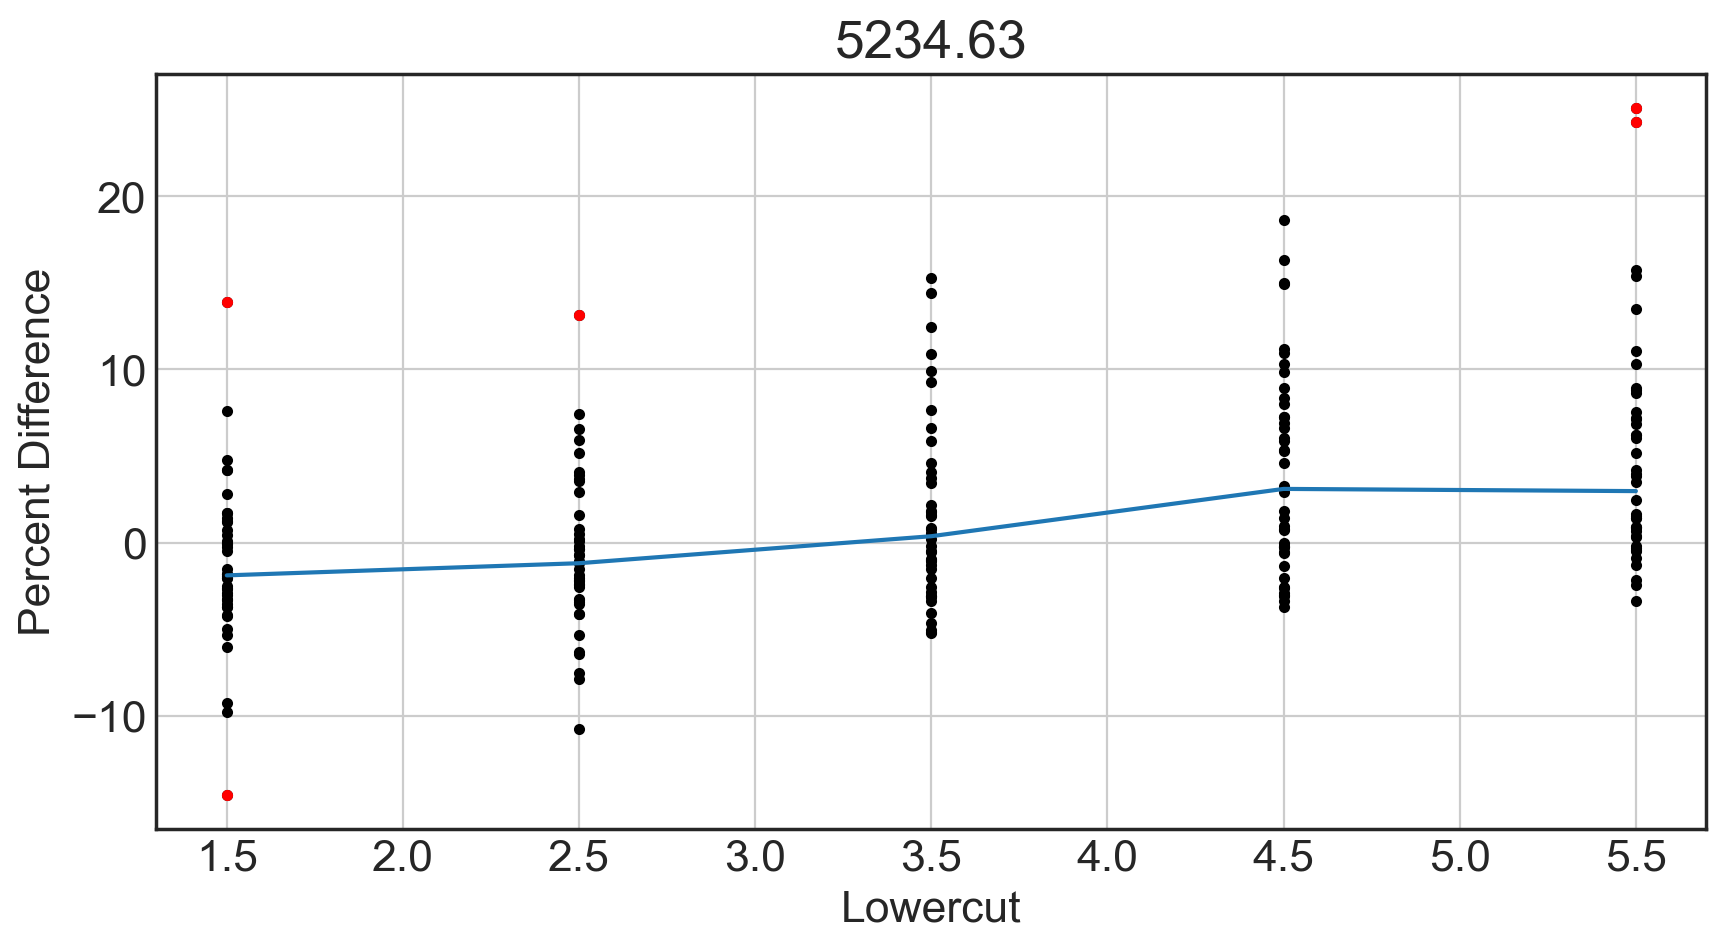

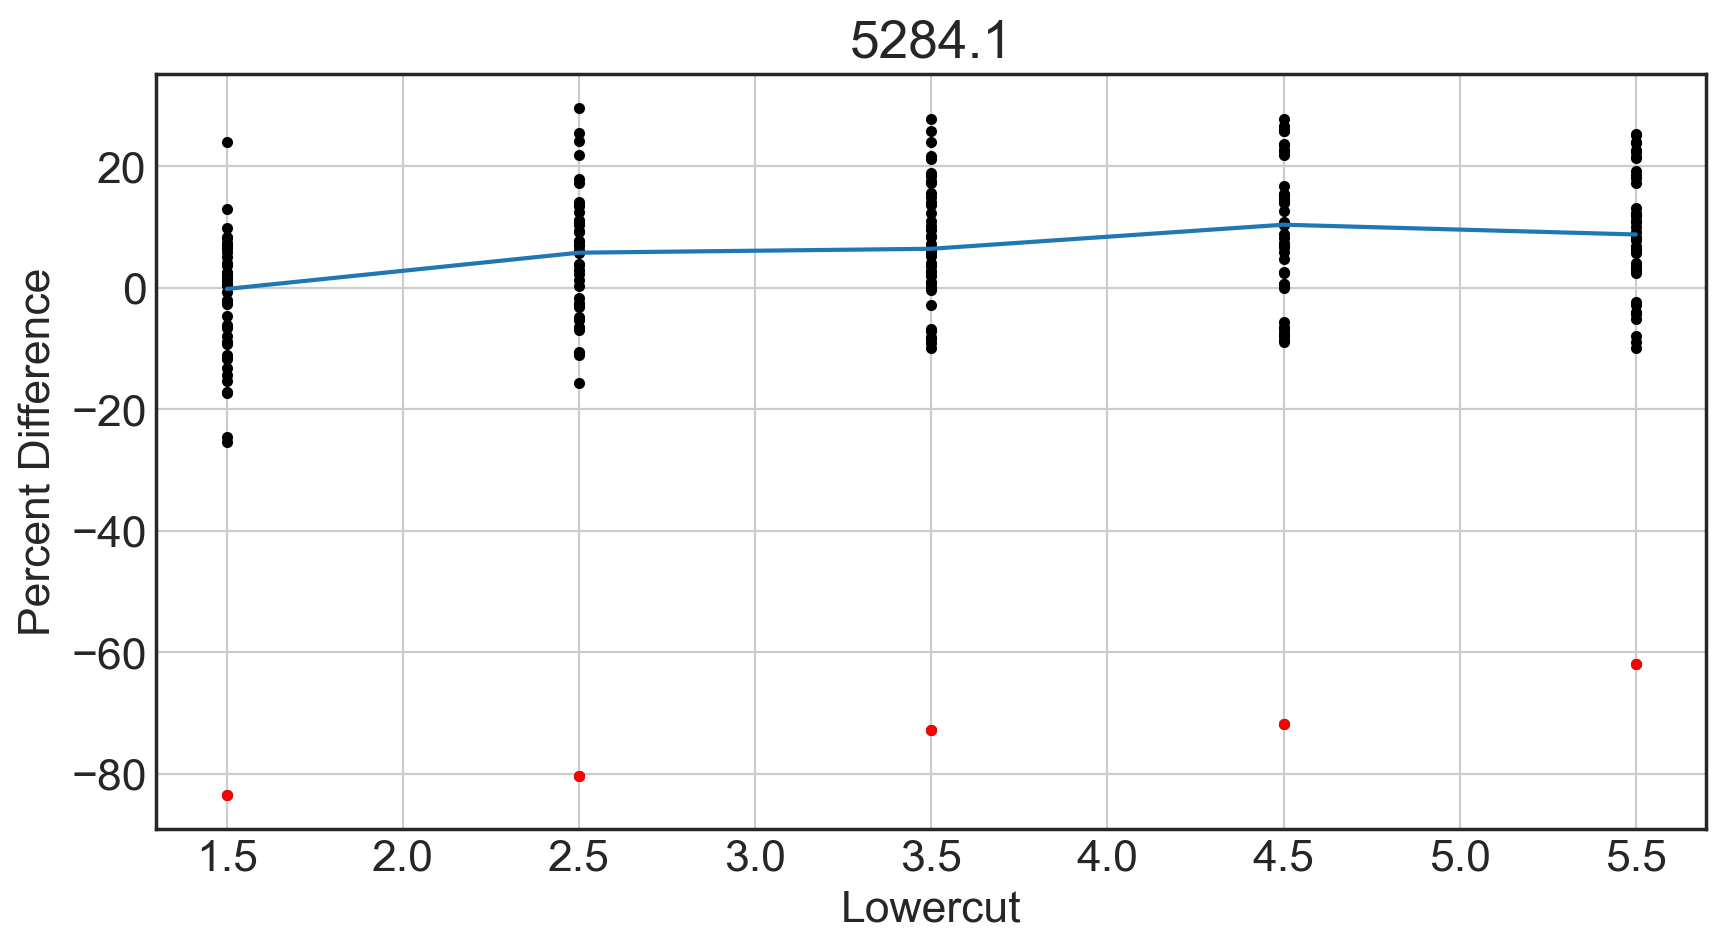

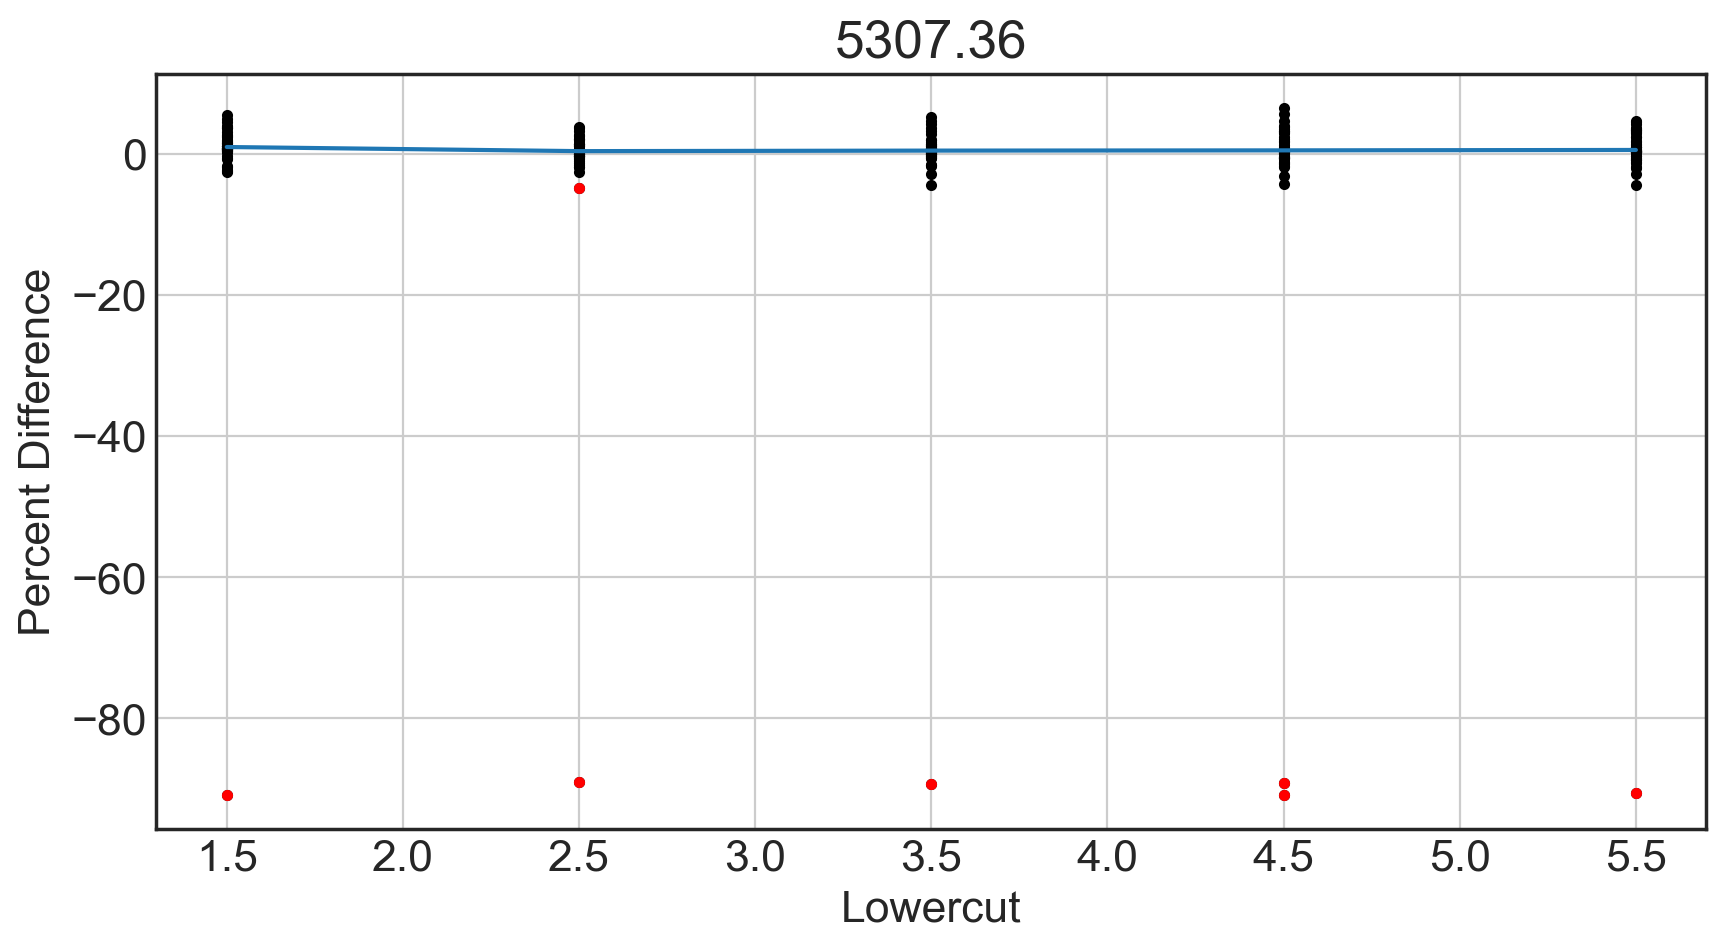

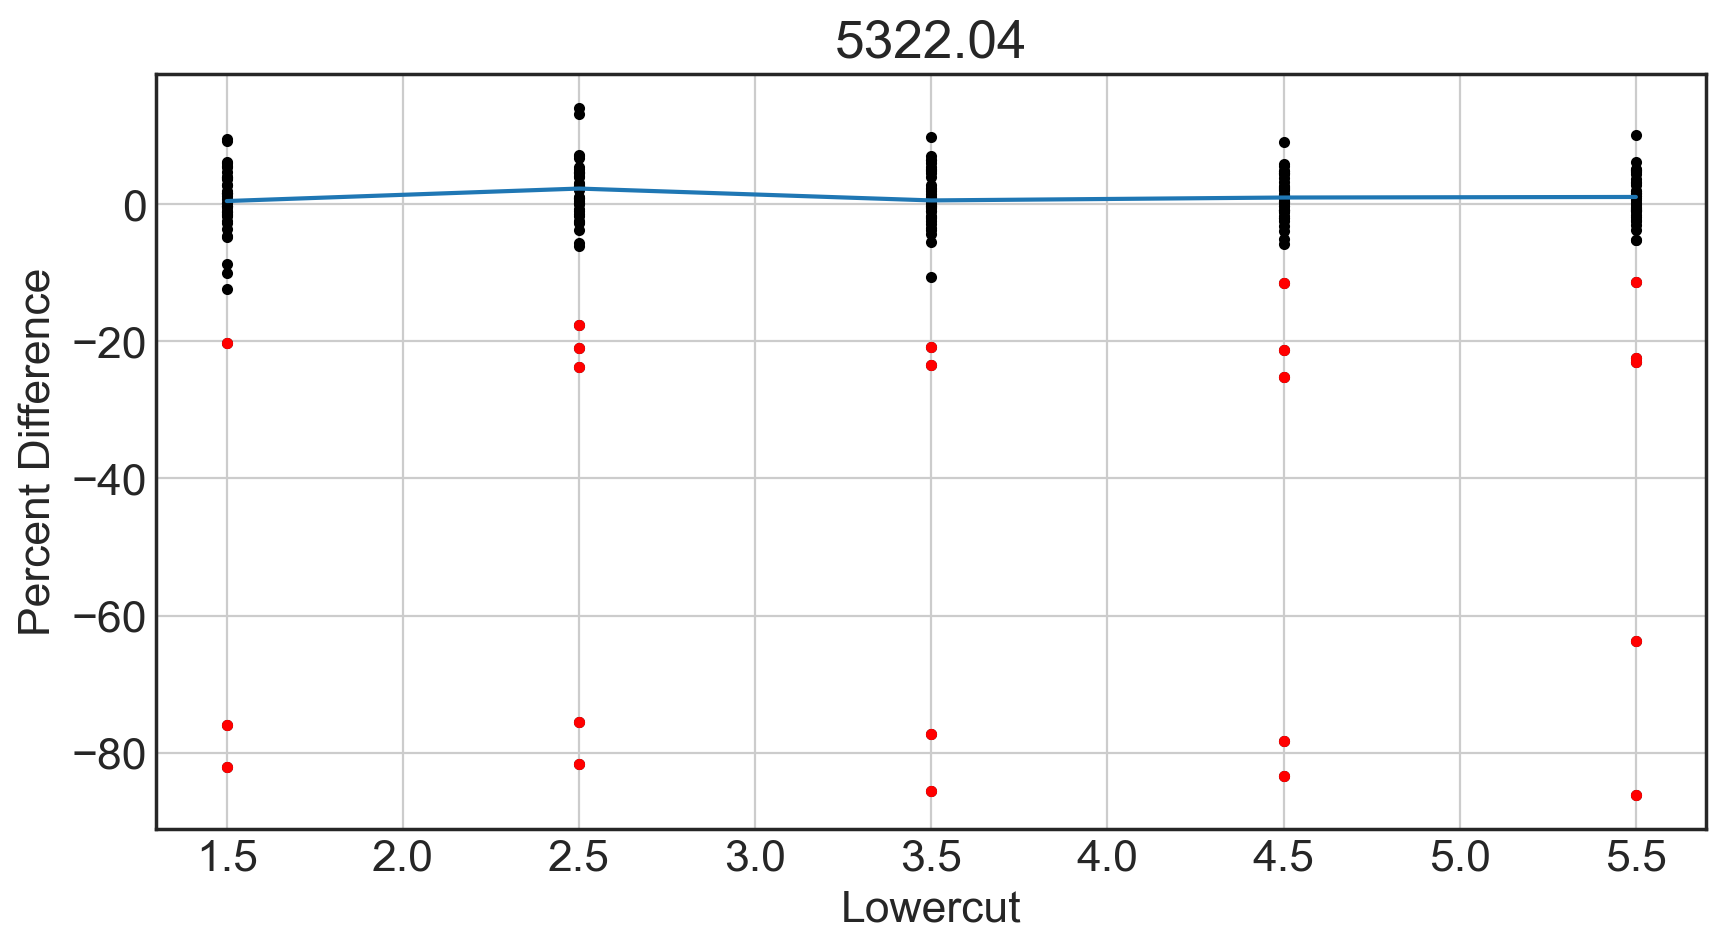

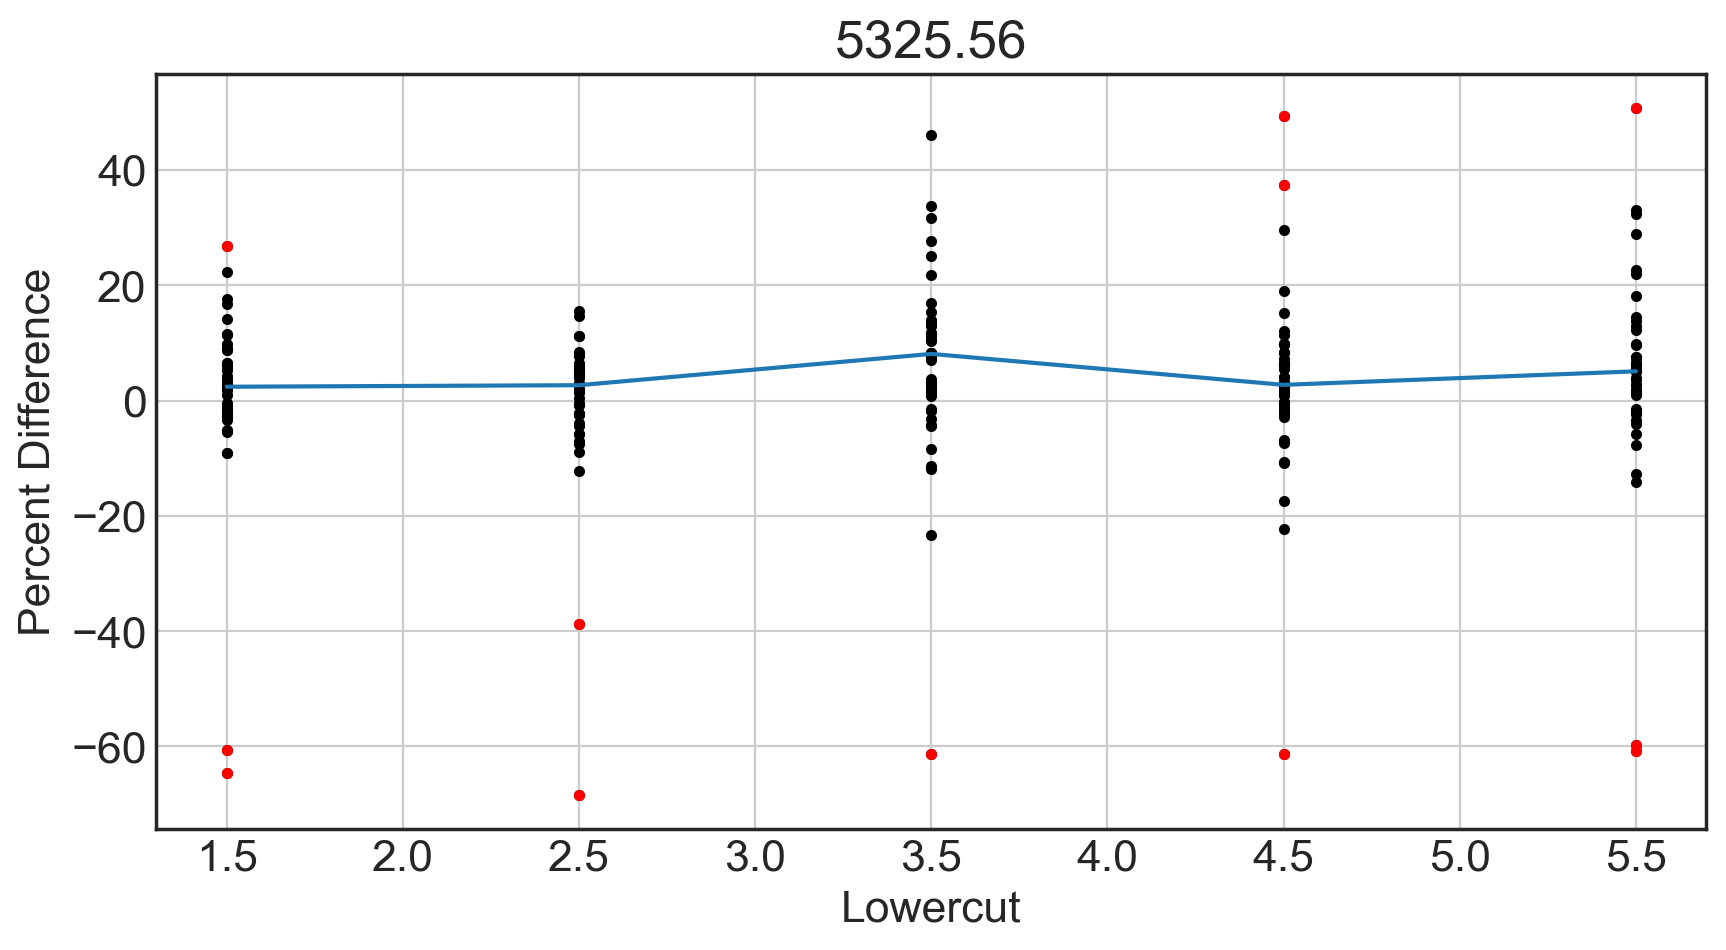

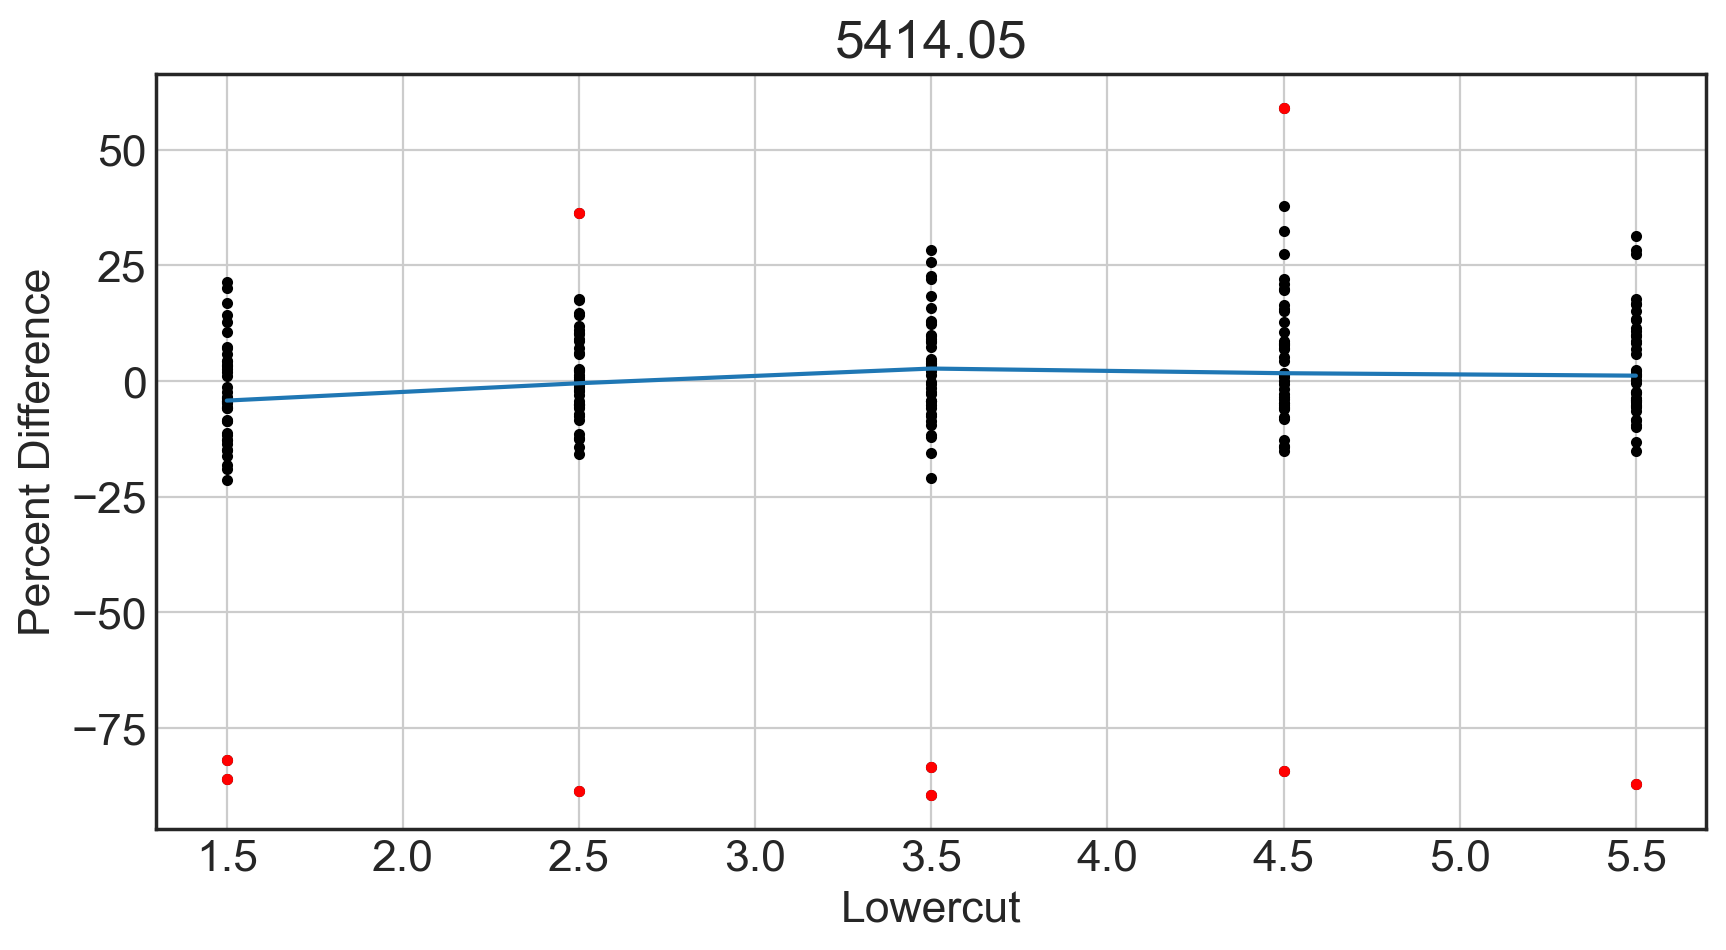

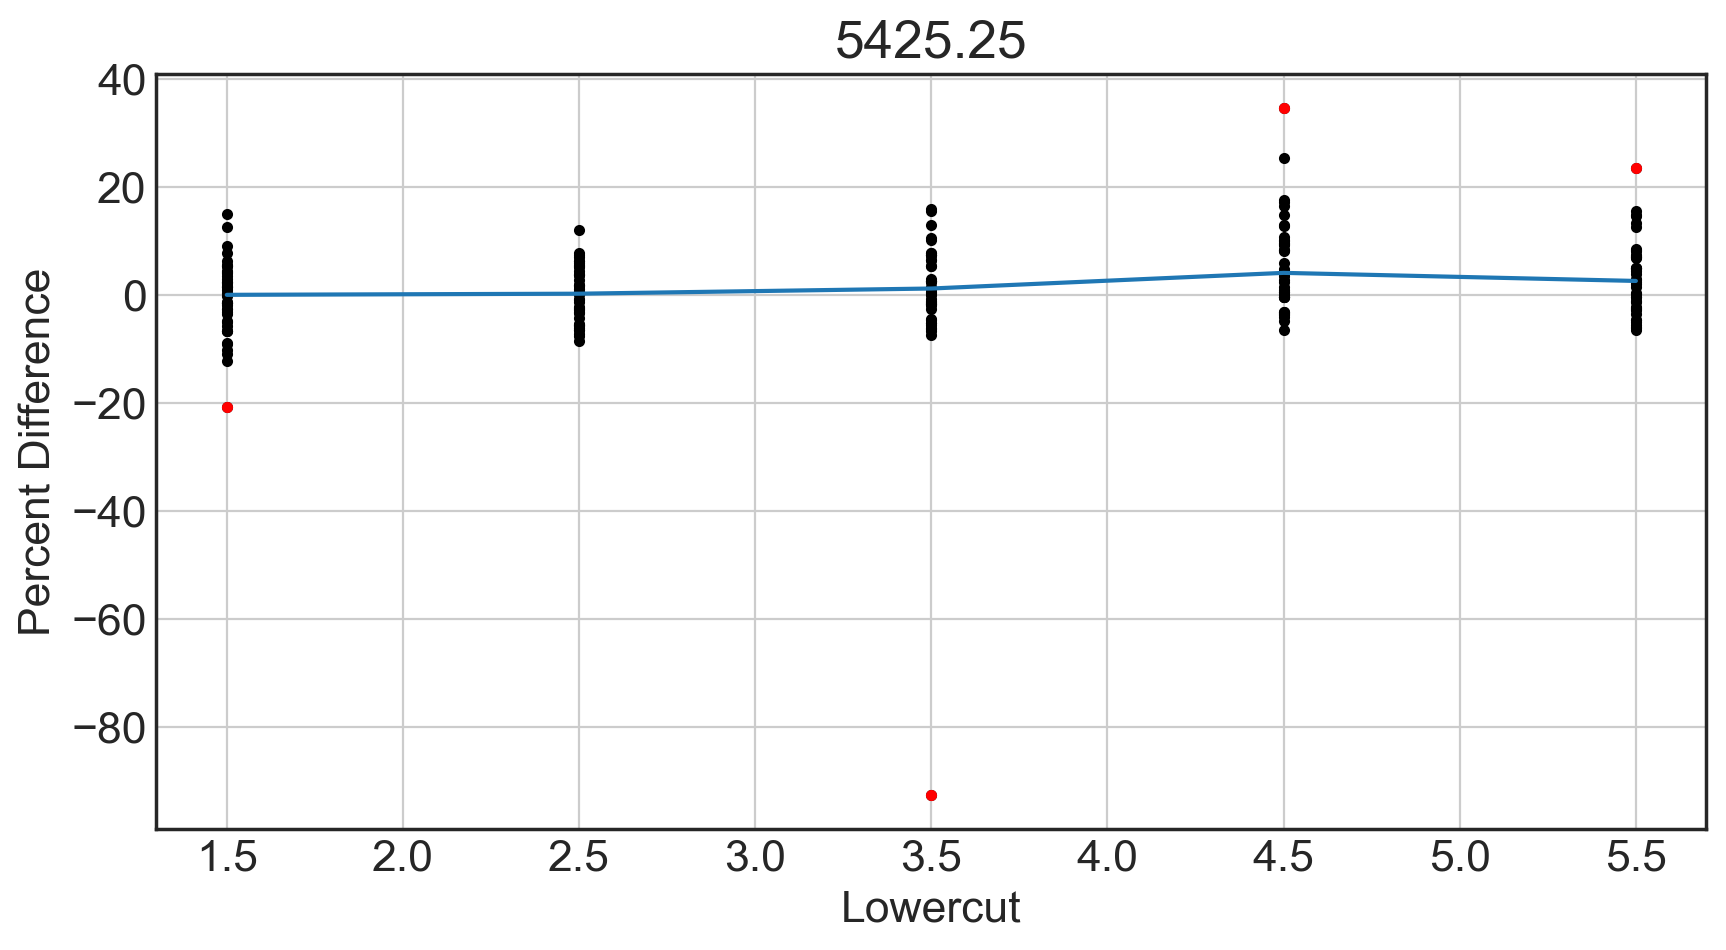

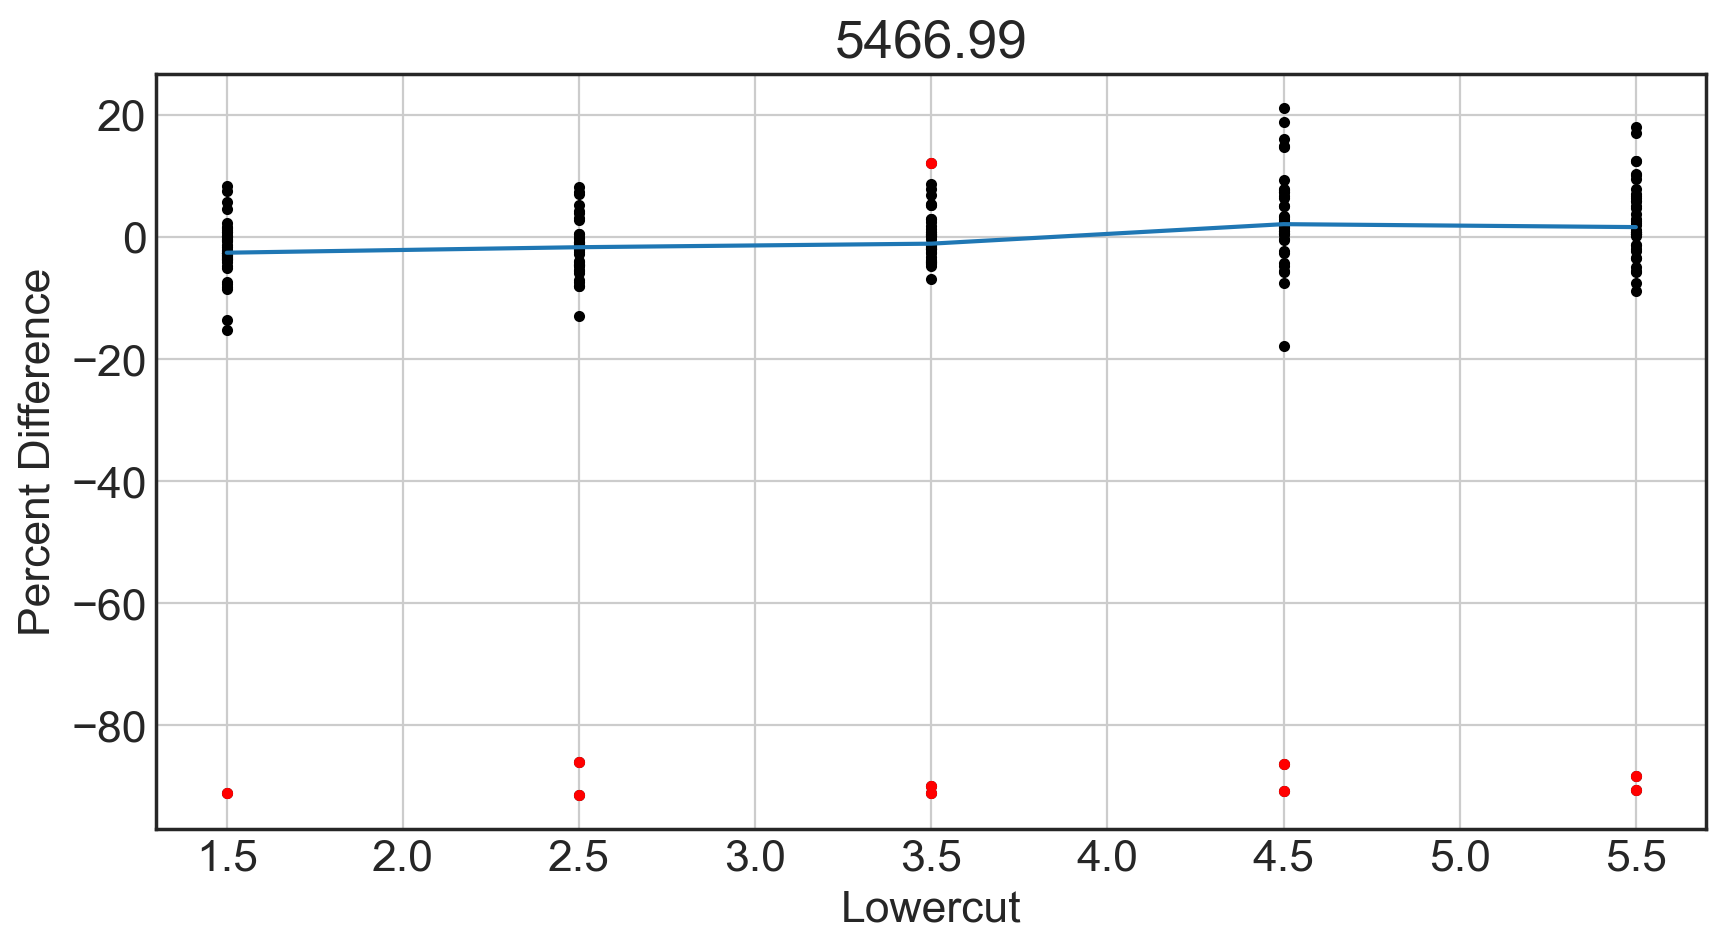

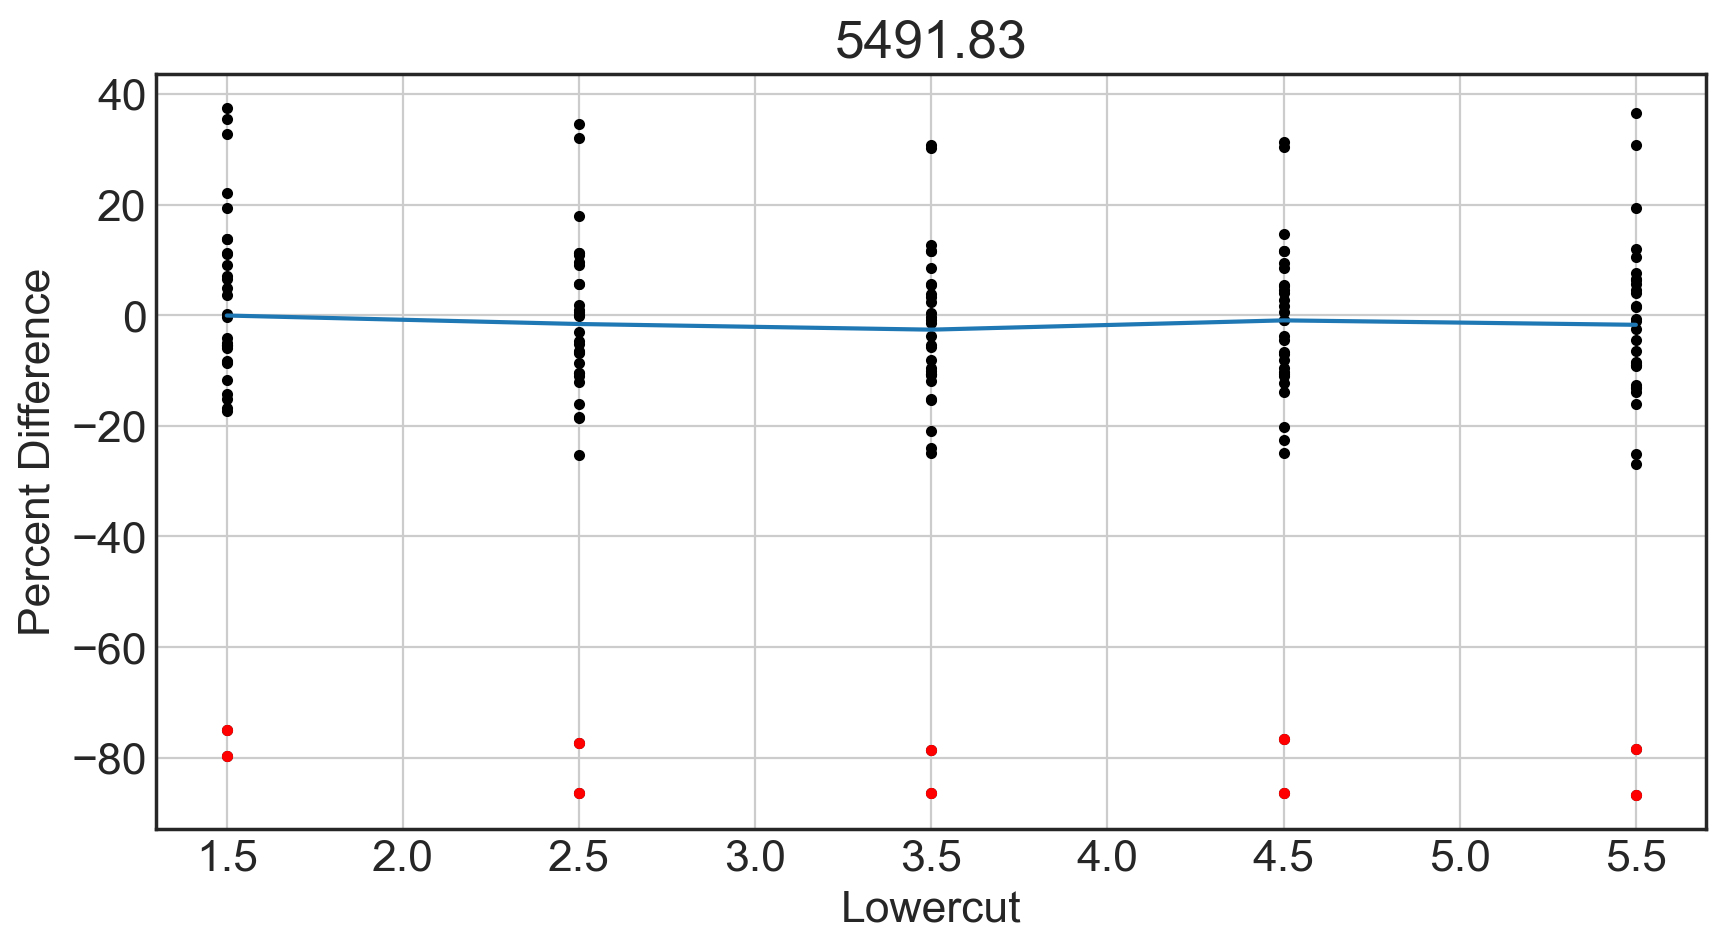

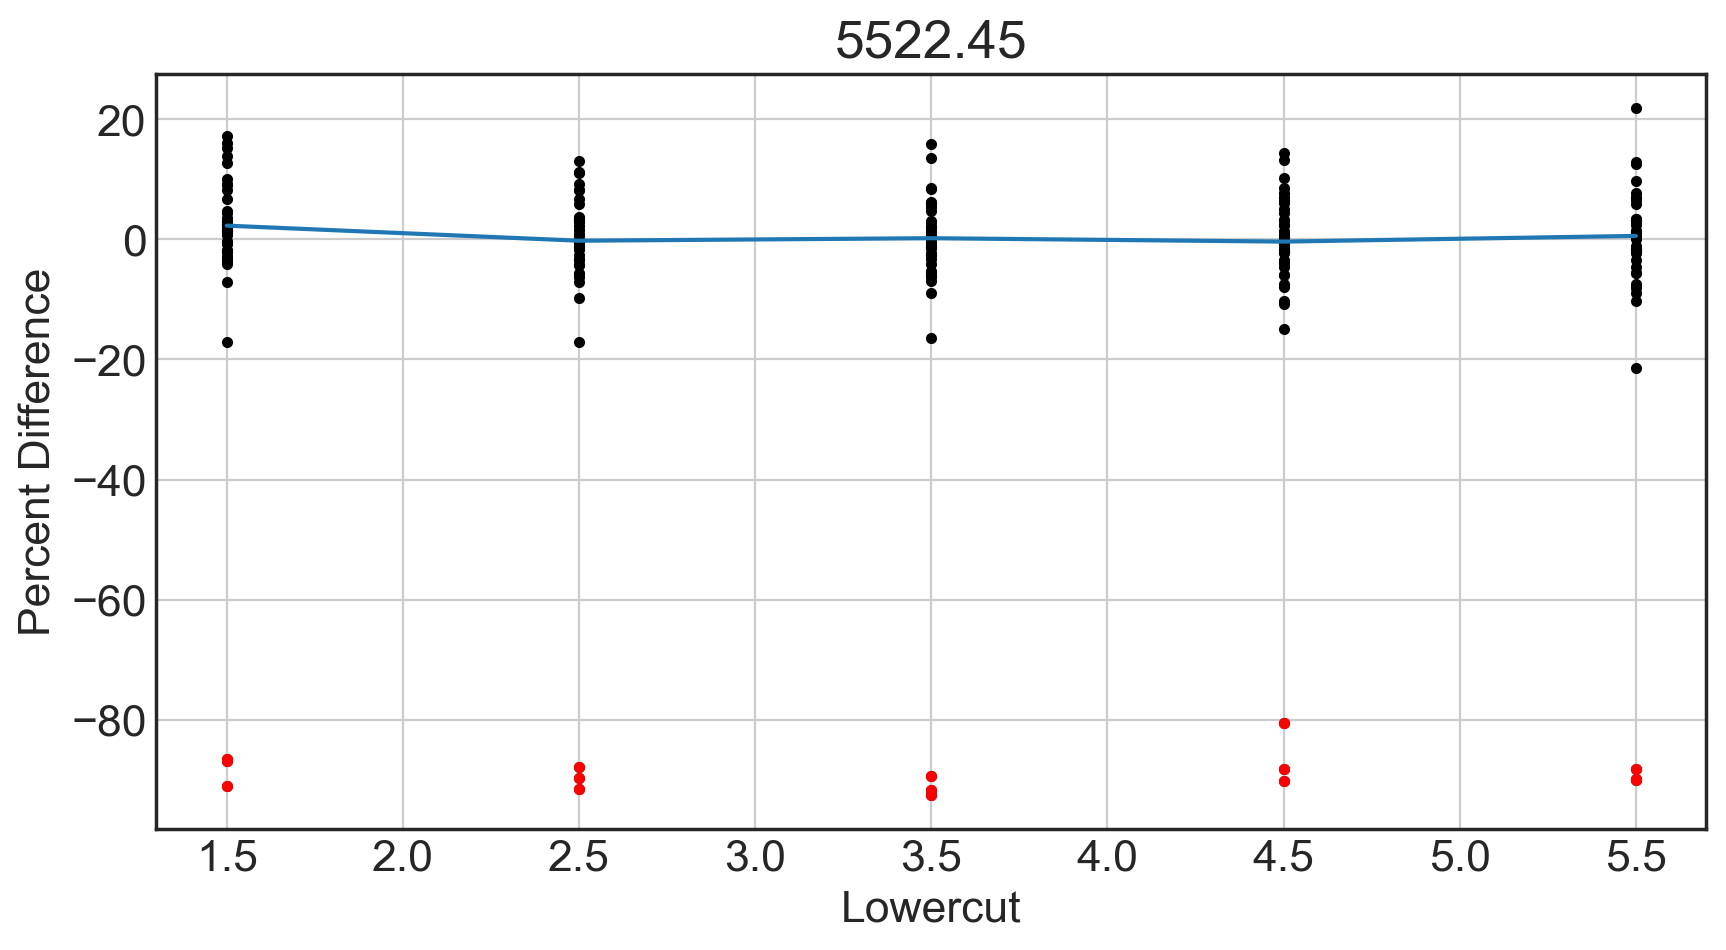

In [66]:

line_dict = {}
for line in line_list[0:10]:
    if plot:
        plt.figure(figsize=(10,5), dpi = 200)
        plt.grid()
    pdiff_all = []
    hand_all = []
    for i in range(len(outputs)):
        if 'ngc2204_3321red' in outputs[i]:
            continue
        with open(outputs[i]) as jsonfile, open(by_hand[i]) as ewfile:
            jsondata = json.load(jsonfile)
            handdata = pd.read_csv(ewfile, delim_whitespace = True, header = None)[[0,4]]
            hand_dict = dict(zip([str(i) for i in handdata[0].tolist()], handdata[4].tolist()))
            key = line
            wsize = [size for size,ew,wav in jsondata[key]]
            ew_meas = [ew for size,ew,wav in jsondata[key]]
            #print(outputs[i])
            #print(ew_meas)
            #print(hand_dict[key])
            
            label = disp_df['JSON File'][i].split('/')[-1].split('.')[0]
            if hand_dict[key] == 0.0:
                continue
            if len(wsize) < len_range:
                continue
            byhand_mask = [hand_dict[key] == 0]
            ew_pdiff = ((np.array(ew_meas) - hand_dict[key])/hand_dict[key]) * 100
            ew_absdiff = np.array(ew_meas) - hand_dict[key]
            probe = np.array(ew_meas)
            pdiff_all.append(ew_pdiff)
            hand_all.append(hand_dict[key])
    
    #print(hand_all)
    #print(pdiff_all)
    pdiff_all = np.array(pdiff_all,dtype='object').T

    
    #Sigma Clip
    sigma = 3

    pdiff_sclip_marrs = [sigma_clip(np.array(pdiff_all[wsizes.index(ws_val)]).astype(float),sigma=sigma) 
                         for ws_val in wsizes]
    pdiff_sclip = [np.ma.compressed(marr) for marr in pdiff_sclip_marrs]
    bad_stars = [[i for i, x in enumerate(marr.mask) if x] for marr in pdiff_sclip_marrs]
    
    clipped_data = [marr.data[marr.mask] for marr in pdiff_sclip_marrs] # True in mask corresponds to an outlier
    
    #print(np.shape(pdiff_sclip))
    #print(np.shape(pdiff_all))
    #print(len(pdiff_all))
    if plot:
        for pdiff in np.array(pdiff_all).T:
            plt.plot(wsizes,pdiff,'.',color='k')
        for wsize, clipped in zip(wsizes,clipped_data):
            n_clipped = len(clipped)
            if n_clipped == 0:
                continue
            else:
                wsize_arr = np.array([wsize]*n_clipped)
                plt.plot(wsize_arr, clipped, '.', color='r')
        #plt.plot(wsizes,pdiff,'.',color='k')
            
    avg_pdiffs = [np.median(pdiff_sclip[wsizes.index(ws_val)]) for ws_val in wsizes]
    std_pdiffs = [np.median(abs(pdiff_sclip[wsizes.index(ws_val)])) * 1.5 for ws_val in wsizes] # median of abs value of the diff
    #std_pdiffs = [iqr(pdiff_sclip[lowcuts.index(lc_val)]) for lc_val in lowcuts] # interquartile range
    #std_pdiffs = [np.std(pdiff_sclip[lowcuts.index(lc_val)]) for lc_val in lowcuts]  # standard deviation 
    #print(std_pdiffs)
    
    if plot:
        plt.plot(wsizes, avg_pdiffs)

    best_wsize = wsizes[np.argmin(std_pdiffs)] #Best lowcut is solution with smallest spread (not solution that has the closest percent difference)
    #pdiff_offset = avg_pdiffs[np.argmin(std_pdiffs)] # The mean percent difference associated with the chosen lowcut value is the offset value
    pdiff_offset = avg_pdiffs
    #print(pdiff_offset)
    if plot:
        plt.title(line)
        plt.xlabel("Lowercut")
        plt.ylabel("Percent Difference")
        print("======")
        print(line)
        print("Best Window Size:", best_wsize, np.min(std_pdiffs))
        print("Uncertainty per Window Size:", std_pdiffs)
        print("Outlier Stars:", bad_stars)
        print("Outlier Pdiffs:", (wsizes,clipped_data))
        if np.min(std_pdiffs) > 10:
            print("WARNING: Large Standard Deviation, Bimodal?")
    
    line_dict[line] = (best_wsize, np.min(std_pdiffs), pdiff_offset,np.mean(hand_all))
if write_out:
    f_out.close()
    


In [43]:
test = [1,2,3,4,5,6,7,8,9,100]
test_sclip = sigma_clip(test)
[i for i, x in enumerate(test_sclip.mask) if x] #indices of truth

[9]

In [45]:
t = 132.16
b = 125.95

((t-b)/b) * 100

4.930527987296541

In [49]:
np.array(test) == 1

array([ True, False, False, False, False, False, False, False, False, False], dtype=bool)